In [6]:
#Imports for the lab
import numpy as np
import timeit

1\. **Reductions**

Given the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

   1. find the total mean
   2. find the mean for each row and column

In [7]:
#Declaring a matrix 4x3 which contains incremental numbers up to 12
m = np.arange(12).reshape((3,4))

#Print the matrix
print("M = ", m, "\n----------------------")

#Print the mean of the matrix
print("Mean of M = ", np.mean(m), "\n----------------------")

#For each row, print the mean of the row
for i in range(len(m)):
    print("Mean of row {} = {}".format(i, np.mean(m[i])))

print("----------------------")

#Transpose the matrix so now the columns are the rows
col_means = np.mean(m.transpose(), axis=0)

#For each row, print the mean of the row
for i in range(len(col_means)):
    print("Mean of column {} = {}".format(i, col_means[i]))

M =  [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 
----------------------
Mean of M =  5.5 
----------------------
Mean of row 0 = 1.5
Mean of row 1 = 5.5
Mean of row 2 = 9.5
----------------------
Mean of column 0 = 1.5
Mean of column 1 = 5.5
Mean of column 2 = 9.5


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [8]:
#Declaring and defining two arrays
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])

#Printing the arrays
print("u = ", u)
print("v = ", v, "\n---------------------------")

#Printing the outer product between the two arrays
print("Using np.outer()")
print("u x v = \n", np.outer(u,v), "\n---------------------------")

#Defining a matrix of zeros of dimension len(u) x len(v) 
w = np.zeros((len(u), len(v)))

#Using broadcasting doing the outer product between the two arrays
print("Using numpy broadcasting operations")
w = np.expand_dims(u, axis=1) * np.expand_dims(v, axis=0)
print("u x v = \n", w)


u =  [1 3 5 7]
v =  [2 4 6 8] 
---------------------------
Using np.outer()
u x v = 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 
---------------------------
Using numpy broadcasting operations
u x v = 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a $10 \times 6$ matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [38]:
a = np.random.rand(10, 6) * 3 # 60 random float between 0 and 3
print("a = \n", np.round(a,2), "\n-----------------------------")

# create a mask to filter numbers < 0.3
mask = (a < 0.3)

#Indexing with a mask can be very useful to assign a new value to a sub-array
a[mask] = 0

print("filtered_a = \n", np.round(a,2))

a = 
 [[2.89 1.9  0.99 2.72 1.98 2.85]
 [1.32 1.35 1.74 0.86 0.82 1.13]
 [2.82 1.94 1.94 0.02 2.27 1.61]
 [1.18 0.43 1.87 0.94 2.33 0.07]
 [0.81 2.74 0.99 0.78 0.08 1.39]
 [2.06 2.51 1.52 0.7  1.6  1.29]
 [1.06 1.4  2.33 2.63 2.04 0.07]
 [1.5  0.04 1.1  1.79 2.54 2.16]
 [1.43 1.12 1.41 0.04 1.59 1.2 ]
 [3.   1.38 0.77 0.39 1.63 1.25]] 
-----------------------------
filtered_a = 
 [[2.89 1.9  0.99 2.72 1.98 2.85]
 [1.32 1.35 1.74 0.86 0.82 1.13]
 [2.82 1.94 1.94 0.   2.27 1.61]
 [1.18 0.43 1.87 0.94 2.33 0.  ]
 [0.81 2.74 0.99 0.78 0.   1.39]
 [2.06 2.51 1.52 0.7  1.6  1.29]
 [1.06 1.4  2.33 2.63 2.04 0.  ]
 [1.5  0.   1.1  1.79 2.54 2.16]
 [1.43 1.12 1.41 0.   1.59 1.2 ]
 [3.   1.38 0.77 0.39 1.63 1.25]]


4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the `sin` and `cos` functions and indicate graphically (with a line or a marker) where they are close

In [10]:
#Defining the cardinality of the matrix
cardinality = 100

#Using linspace to fill with every 100th of 2pi
m = np.linspace(0, 2 * np.pi, cardinality)
print("m = ", m)

m =  [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.6

In [27]:
#Extraction every 10 elements using slice
sub_m = slice(0,100,10)
print(m[sub_m])

[0.         0.63466518 1.26933037 1.90399555 2.53866073 3.17332591
 3.8079911  4.44265628 5.07732146 5.71198664]


In [39]:
#Reversing using slice
rev_m = slice(None,None,-1)
print("Reversed m = ", m[rev_m], "\n--------------------------")

Reversed m =  [6.28318531 6.21971879 6.15625227 6.09278575 6.02931923 5.96585272
 5.9023862  5.83891968 5.77545316 5.71198664 5.64852012 5.58505361
 5.52158709 5.45812057 5.39465405 5.33118753 5.26772102 5.2042545
 5.14078798 5.07732146 5.01385494 4.95038842 4.88692191 4.82345539
 4.75998887 4.69652235 4.63305583 4.56958931 4.5061228  4.44265628
 4.37918976 4.31572324 4.25225672 4.1887902  4.12532369 4.06185717
 3.99839065 3.93492413 3.87145761 3.8079911  3.74452458 3.68105806
 3.61759154 3.55412502 3.4906585  3.42719199 3.36372547 3.30025895
 3.23679243 3.17332591 3.10985939 3.04639288 2.98292636 2.91945984
 2.85599332 2.7925268  2.72906028 2.66559377 2.60212725 2.53866073
 2.47519421 2.41172769 2.34826118 2.28479466 2.22132814 2.15786162
 2.0943951  2.03092858 1.96746207 1.90399555 1.84052903 1.77706251
 1.71359599 1.65012947 1.58666296 1.52319644 1.45972992 1.3962634
 1.33279688 1.26933037 1.20586385 1.14239733 1.07893081 1.01546429
 0.95199777 0.88853126 0.82506474 0.76159822 0.698

In [40]:
#Defining a mask wich filters the angles for which the absolute difference between sin and cos is less than 0.1
mask = (np.abs(np.sin(m)-np.cos(m)) < 0.1)
#Applying the mask
filtered_m = m[mask]

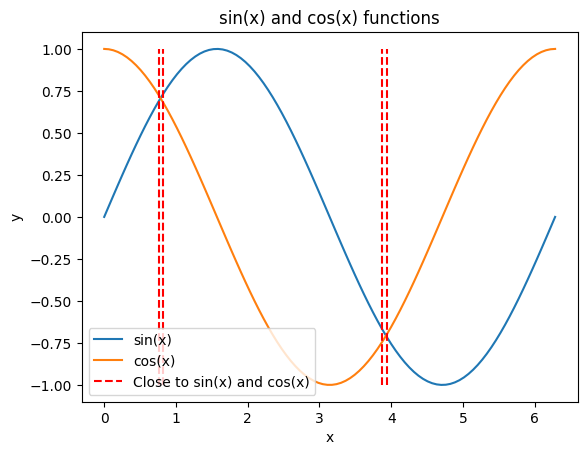

In [14]:
import matplotlib.pyplot as plt
# Create a plot showing the sin and cos functions
plt.plot(m, np.sin(m), label='sin(x)')
plt.plot(m, np.cos(m), label='cos(x)')

# Indicate graphically (with a line or a marker) where the sin and cos functions are close
plt.vlines(filtered_m, ymin=-1, ymax=1, color='red', linestyle='dashed', label='Close to sin(x) and cos(x)')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin(x) and cos(x) functions')

# Add legend
plt.legend()

# Show the plot
plt.show()

5\. **Matrices**

Create a matrix that shows the $10 \times 10$ multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [15]:
#Defining the matrix using the outer product between two arrays [1,2,...,10]
multiplication_table = np.outer(np.arange(1,11), np.arange(1,11))
print(multiplication_table)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


In [16]:
# Find the trace of the matrix
trace = np.trace(multiplication_table)
# Extract the anti-diagonal matrix
anti_diagonal_matrix = multiplication_table[::-1, ::1].diagonal()

# Extract the diagonal offset by 1 upwards
diagonal_offset_by_1_upwards = multiplication_table[1:, :].diagonal()

print("Trace of the matrix:", trace)

print("Anti-diagonal matrix:", anti_diagonal_matrix)

print("Diagonal offset by 1 upwards:", diagonal_offset_by_1_upwards)

Trace of the matrix: 385
Anti-diagonal matrix: [10 18 24 28 30 30 28 24 18 10]
Diagonal offset by 1 upwards: [ 2  6 12 20 30 42 56 72 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: `0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448`

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [17]:
#Declaring the array of distances in miles between the cities
positions = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
#Defining the convertion coefficient between and mile
mile_to_km = 1.6

# Create a 2D grid of distances using broadcasting
distances = np.abs(positions[:, None] - positions[None, :])

print("Distances in miles = \n", distances, "\n")
print("Distances in km = \n", distances * mile_to_km)

Distances in miles = 
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]] 

Distances in km = 
 [[   0.   316.8  484.8 1177.6 1393.6 1880.  2360.  2470.4 3060.8 3916.8]
 [ 316.8    0.   168.   860.8 1076.8 1563.2 2043.2 2153.6 2744.  3600. ]
 [ 484.8  168.     0.   692.8  908.8 1395.2 1875.2 1985.6 2576.  3432. ]
 [1177.6  860.8  692.8    0.   216.   702.4 1182.4 1292.8 1883.2 2739.2]
 [1393.6 1076.8  908.8  216.     0.   486.4  966.4 1076.8 1667.2 2523.2]
 [1880.  1563.2 1395.2  702.4  486.4    0.   480.   590.4 1

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Construct a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [18]:
def primer(N):
    #Defining a matrix containing numbers up to N
    numbers = np.arange(0,N)
    #Using an ausiliar matrix
    primes = numbers
    #For every number
    for x in range(2, N):
        #Saving the first occurence
        mask_original = (numbers == x)
        #If the current number is a multiple
        mask = (numbers % x == 0)
        #Set the number to -1
        numbers[mask] = -1
        #Restore the first number
        numbers[mask_original] = x
    #Extracting every non-multiple in theoriginal matrix to 0 
    primes = np.where(numbers != -1)[0]
    return primes

In [19]:
def sieve_of_Eratosthenes_impl(N):
    # Construct a shape (N,) boolean array, which is the mask
    numbers = np.ones(N, dtype=bool)
    m = np.arange(N)
    #True = prime number

    # Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
    for i in range(2, int(np.sqrt(N)) + 1):
        if numbers[i]:
            numbers[i * i::i] = False

    # Apply the mask to obtain an array of ordered prime numbers
    primes = np.where(numbers)[0]

    return primes

In [20]:
def timer_primer(N):
    #Measuring the time of the computation
    t = timeit.timeit(lambda: primer(N), number = 1)
    print("Time to compute the prime numbers in the 0-{} with primer function: {} seconds".format(N, t))

def timer_SOE(N):
    t = timeit.timeit(lambda: sieve_of_Eratosthenes_impl(N), number = 1)
    #Measuring the time of the computation
    print("Time to compute the prime numbers in the 0-{} with sieve of Eratosthenes: {} seconds".format(N, t))

In [21]:
N = 99
print("Prime numbers from ", 0, " to ", N+1, " = ", primer(N), "\n-----------------------------")
print("Prime numbers from ", 0, " to ", N+1, " using sieve of Eratosthenes = ", sieve_of_Eratosthenes_impl(N), "\n-----------------------------")

timer_SOE(9)
timer_SOE(99)
timer_SOE(999)

timer_primer(9)
timer_primer(99)
timer_primer(999)

Prime numbers from  0  to  10  =  [1 2 3 5 7] 
-----------------------------
Prime numbers from  0  to  10  using sieve of Eratosthenes =  [0 1 2 3 5 7] 
-----------------------------
Time to compute the prime numbers in the 0-9 with sieve of Eratosthenes: 0.00010330002987757325 seconds
Time to compute the prime numbers in the 0-99 with sieve of Eratosthenes: 0.0001047999830916524 seconds
Time to compute the prime numbers in the 0-999 with sieve of Eratosthenes: 0.00013970001600682735 seconds
Time to compute the prime numbers in the 0-9 with primer function: 0.00020910002058371902 seconds
Time to compute the prime numbers in the 0-99 with primer function: 0.003263699996750802 seconds
Time to compute the prime numbers in the 0-999 with primer function: 0.05052250000881031 seconds


8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

In [44]:
import random

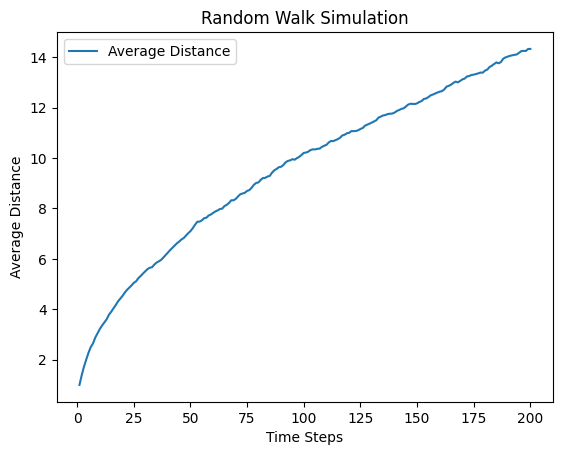

In [45]:
import matplotlib.pyplot as plt

# Set the number of walkers and time steps
walkers = 1000
steps = 200

# Create a 2D array with random +1 or -1 steps for each walker
random_walks = np.random.randint(0, 2, size=(walkers, steps)) * 2 - 1

# Calculate the cumulative sum along each row to get walker positions
positions = np.cumsum(random_walks, axis=1)

# Calculate the squared distance for each walker at each step
squared_distances = positions ** 2

# Calculate the mean of squared distances at each step by columns
mean_squared_distances = np.mean(squared_distances, axis=0)

# Optional: Plot the average distances as a function of time (step)
time_steps = np.arange(1, steps + 1)
plt.plot(time_steps, np.sqrt(mean_squared_distances), label='Average Distance')
plt.xlabel('Time Steps')
plt.ylabel('Average Distance')
plt.title('Random Walk Simulation')
plt.legend()
plt.show()